In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Empty_part.csv to Empty_part.csv
Saving Training_wells.csv to Training_wells.csv
User uploaded file "Empty_part.csv" with length 21124 bytes
User uploaded file "Training_wells.csv" with length 3338 bytes


# Препроцессинг

In [ ]:
train = pd.read_csv('Training_wells.csv')
train

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [ ]:
test = pd.read_csv('Empty_part.csv')
test

,Well,X,Y
0,201-901,201,901
1,201-902,201,902
2,201-903,201,903
3,201-904,201,904
4,201-905,201,905
...,...,...,...
1237,246-926,246,926
1238,246-927,246,927
1239,246-928,246,928
1240,246-929,246,929


In [ ]:
train = train.drop(columns=['Well'])
test = test.drop(columns=['Well'])

In [ ]:
train['X'] -= 201
train['Y'] -= 901
test['X'] -= 201
test['Y'] -= 901

In [ ]:
train

,X,Y,NTG
0,0,6,0.2006
1,0,13,0.3624
2,0,23,0.4381
3,1,21,0.4289
4,1,24,0.4021
...,...,...,...
133,44,7,0.2719
134,44,10,0.3780
135,44,22,0.4239
136,45,4,0.4900


In [ ]:
test

,X,Y
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1237,45,25
1238,45,26
1239,45,27
1240,45,28


In [ ]:
data = train.merge(test, how='outer')

In [ ]:
data

,X,Y,NTG
0,0,6,0.2006
1,0,13,0.3624
2,0,23,0.4381
3,1,21,0.4289
4,1,24,0.4021
...,...,...,...
1375,45,25,NaN
1376,45,26,NaN
1377,45,27,NaN
1378,45,28,NaN


In [ ]:
data.describe()

,X,Y,NTG
count,1380.000000,1380.000000,138.000000
mean,22.500000,14.500000,0.325720
std,13.280731,8.658579,0.072432
min,0.000000,0.000000,0.177000
25%,11.000000,7.000000,0.270175
50%,22.500000,14.500000,0.325900
75%,34.000000,22.000000,0.377475
max,45.000000,29.000000,0.562500


In [ ]:
data = data.sort_values(by=['X', 'Y'])
data

,X,Y,NTG
138,0,0,NaN
139,0,1,NaN
140,0,2,NaN
141,0,3,NaN
142,0,4,NaN
...,...,...,...
1375,45,25,NaN
1376,45,26,NaN
1377,45,27,NaN
1378,45,28,NaN


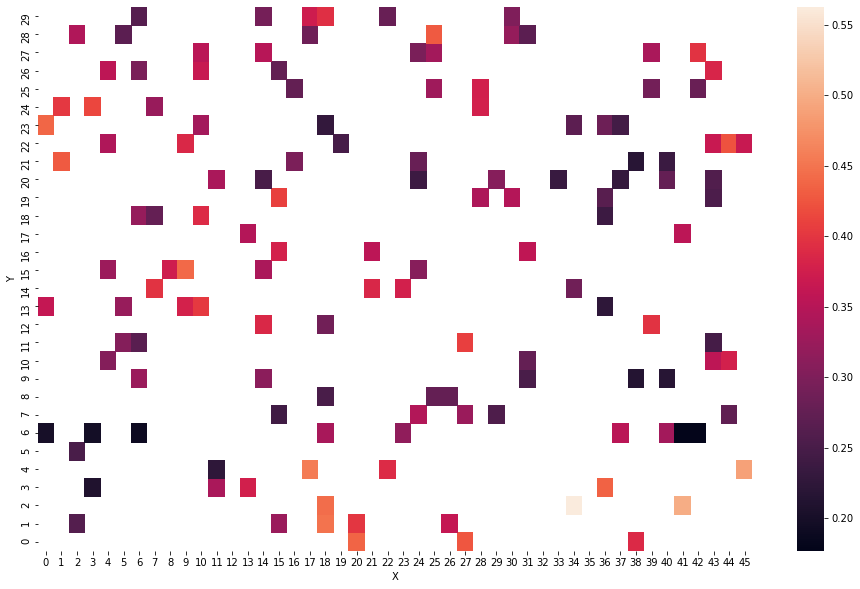

In [ ]:
table = data.pivot('Y', 'X', 'NTG')
plt.figure(figsize=(16,10))
ax = sns.heatmap(table)
ax.invert_yaxis()
plt.show()

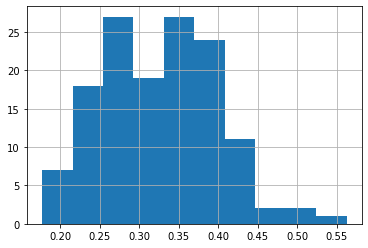

In [ ]:
train['NTG'].hist()

In [ ]:
map_train = table.to_numpy()

# baseline

In [ ]:
def dist(a, b, i, j):
    return ((a - i)**2 + (b - j)**2)

In [ ]:
def stat_sum(a, b, map_train):
    s = 0
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            if not np.isnan(map_train[i,j]):
                if dist(a, b, i, j) > 0:
                    s += 1 / dist(a, b, i, j)
    return s

In [ ]:
def moving_average(a, b, map_train):
    ntg = 0
    s = stat_sum(a, b, map_train)
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            if not np.isnan(map_train[i,j]):
                if dist(a, b, i, j) > 0:
                    ntg += (map_train[i,j] / dist(a, b, i, j)) / s
    return ntg

In [ ]:
map_test = map_train.copy()
for i in range(map_test.shape[0]):
    for j in range(map_test.shape[1]):
        if np.isnan(map_test[i,j]):
            map_test[i,j] = moving_average(i, j, map_train)

In [ ]:
map_test

array([[0.27911216, 0.27269543, 0.26892308, ..., 0.37067341, 0.36209726,
        0.35726335],
       [0.27405203, 0.26678013, 0.2628    , ..., 0.3794241 , 0.36769474,
        0.36446733],
       [0.26998261, 0.26326733, 0.25575673, ..., 0.37965061, 0.37489297,
        0.38091198],
       ...,
       [0.35326062, 0.34989048, 0.34603852, ..., 0.36666248, 0.35187656,
        0.34060583],
       [0.34654287, 0.34448951, 0.3452    , ..., 0.35505136, 0.34473188,
        0.33750135],
       [0.34236933, 0.34097055, 0.33924776, ..., 0.34135586, 0.33754631,
        0.33359569]])

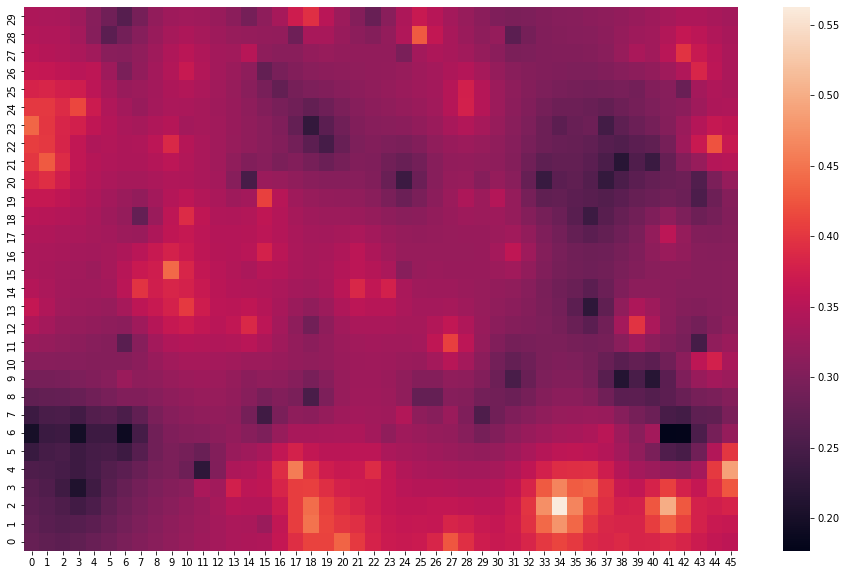

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
test_mask = pd.isnull(map_train)
test_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

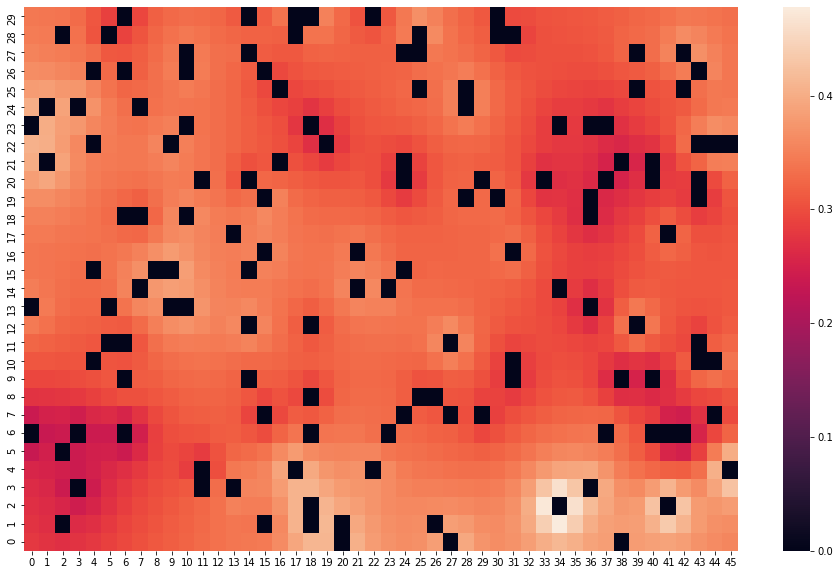

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test * test_mask)
ax.invert_yaxis()
plt.show()

In [ ]:
def get_pandas_out(map_test, test_mask):
    out = pd.DataFrame(columns=["Well", "X", "Y", "NTG"])
    for j in range(map_test.shape[1]):
        for i in range(map_test.shape[0]):
            if test_mask[i,j]:
                out = out.append({"Well": str(201+j)+'-'+str(901+i), "X": 201+j, "Y": 901+i, "NTG": map_test[i,j]}, ignore_index=True)
    return out

In [ ]:
out_baseline = get_pandas_out(map_test, test_mask)
out_baseline

NameError: ignored

In [ ]:
# 26 фев 2021, 22:59:32

out_baseline.to_csv('out_baseline.csv', index=False)

# Карта весов

In [ ]:
map_fake_train = map_train.copy()
for i in range(map_fake_train.shape[0]):
    for j in range(map_fake_train.shape[1]):
        if not np.isnan(map_fake_train[i,j]):
            map_fake_train[i,j] = moving_average(i, j, map_train)

In [ ]:
weight_map_train = map_train / map_fake_train

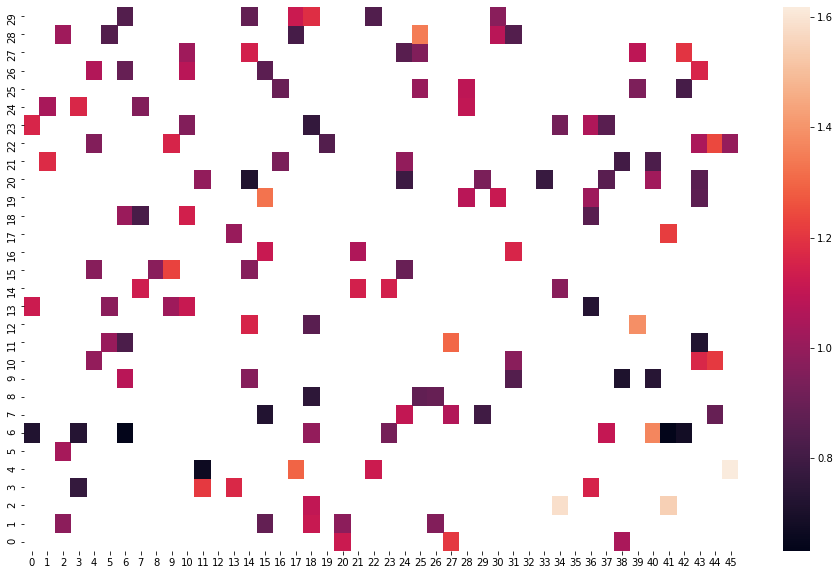

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(weight_map_train)
ax.invert_yaxis()
plt.show()

In [ ]:
weight_map_test = weight_map_train.copy()
for i in range(weight_map_test.shape[0]):
    for j in range(weight_map_test.shape[1]):
        if np.isnan(weight_map_test[i,j]):
            weight_map_test[i,j] = moving_average(i, j, weight_map_train)
weight_map_test

array([[0.94739694, 0.95448421, 0.96090874, ..., 1.16642655, 1.14761378,
        1.13748344],
       [0.94075007, 0.95540322, 0.98159014, ..., 1.20070222, 1.17422237,
        1.16963979],
       [0.92762983, 0.92908611, 0.91889033, ..., 1.2118549 , 1.20985406,
        1.23514354],
       ...,
       [1.02543025, 1.02267218, 1.01941289, ..., 1.11636082, 1.07768047,
        1.04910896],
       [1.01704487, 1.01752045, 1.02453814, ..., 1.08978455, 1.06264807,
        1.04419921],
       [1.01069055, 1.01001772, 1.00810021, ..., 1.05779958, 1.04708072,
        1.03664686]])

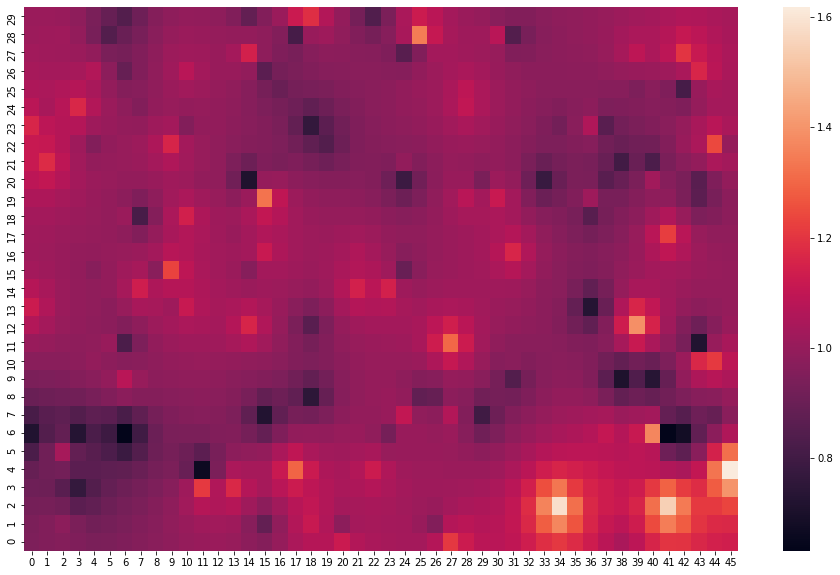

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(weight_map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
map_test = map_train.copy()
for i in range(map_test.shape[0]):
    for j in range(map_test.shape[1]):
        if np.isnan(map_test[i,j]):
            map_test[i,j] = moving_average(i, j, map_train) * weight_map_test[i, j]

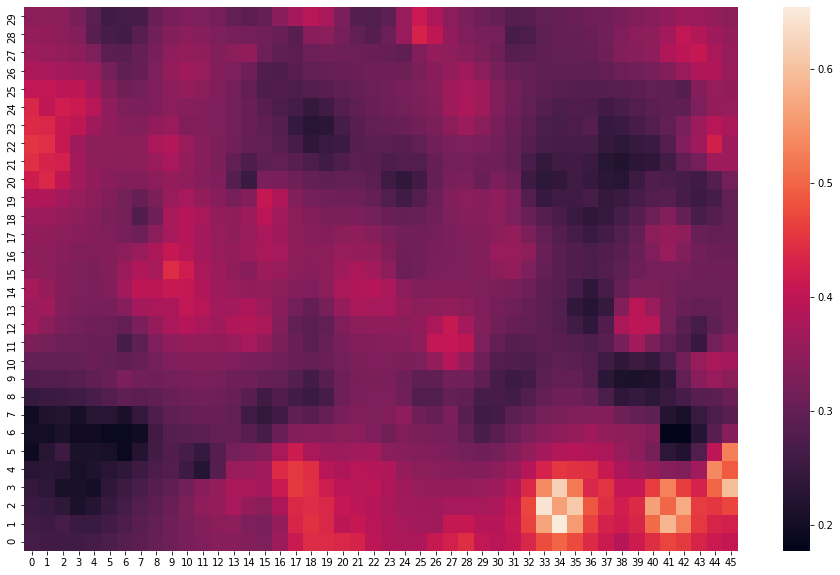

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
out_weighted = get_pandas_out(map_test, test_mask)
out_weighted

,Well,X,Y,NTG
0,201-901,201,901,0.264430
1,201-902,201,902,0.257814
2,201-903,201,903,0.250444
3,201-904,201,904,0.241635
4,201-905,201,905,0.228538
...,...,...,...,...
1237,246-926,246,926,0.352021
1238,246-927,246,927,0.356917
1239,246-928,246,928,0.357333
1240,246-929,246,929,0.352419


In [ ]:
# 27 фев 2021, 02:36:22

out_weighted.to_csv('out_weighted.csv', index=False)

# Стохастический метод

In [ ]:
test_mask = pd.isnull(map_train)

In [ ]:
idx = np.argwhere(test_mask.ravel())

In [ ]:
map_test = np.zeros_like(map_train)
for k in range(5):
    map_test_sample = map_train.copy()
    np.random.seed(k)
    random_idx = np.random.permutation(idx)
    random_idx = np.hstack(np.unravel_index(random_idx, (test_mask.shape[0], test_mask.shape[1])))

    for i, j in random_idx:
        if np.isnan(map_test_sample[i,j]):
            map_test_sample[i,j] = moving_average(i, j, map_test_sample)
    map_test += map_test_sample

map_test /= 5.0

In [ ]:
map_test

array([[0.29502291, 0.28695508, 0.28640622, ..., 0.35324223, 0.3496803 ,
        0.3470746 ],
       [0.29501624, 0.28640146, 0.2628    , ..., 0.36014104, 0.35136639,
        0.34955615],
       [0.29146627, 0.28027814, 0.28465407, ..., 0.3592884 , 0.35127792,
        0.35636995],
       ...,
       [0.34611117, 0.34370878, 0.34104184, ..., 0.33992489, 0.33140075,
        0.32731688],
       [0.34022728, 0.34035671, 0.3452    , ..., 0.3336218 , 0.33109084,
        0.32592408],
       [0.33735944, 0.3377733 , 0.33547534, ..., 0.32713946, 0.327151  ,
        0.32664275]])

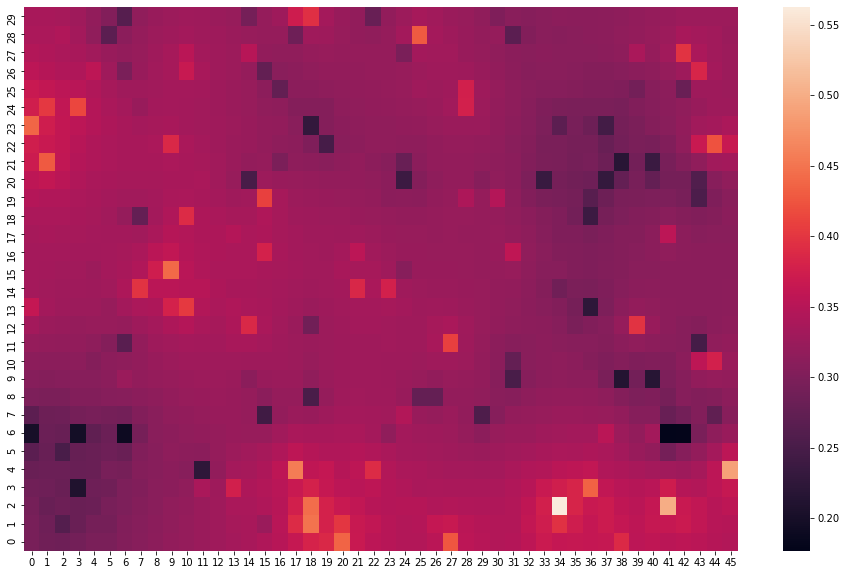

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
out_stochastic = get_pandas_out(map_test, test_mask)
out_stochastic

,Well,X,Y,NTG
0,201-901,201,901,0.295023
1,201-902,201,902,0.295016
2,201-903,201,903,0.291466
3,201-904,201,904,0.287041
4,201-905,201,905,0.281442
...,...,...,...,...
1237,246-926,246,926,0.326224
1238,246-927,246,927,0.327561
1239,246-928,246,928,0.327317
1240,246-929,246,929,0.325924


In [ ]:
# 28 фев 2021, 02:11:53

out_stochastic.to_csv('out_stochastic.csv', index=False)

# Карта весов + стохастический метод

In [ ]:
map_fake_train = map_train.copy()
for i in range(map_fake_train.shape[0]):
    for j in range(map_fake_train.shape[1]):
        if not np.isnan(map_fake_train[i,j]):
            map_fake_train[i,j] = moving_average(i, j, map_train)
weight_map_train = map_train / map_fake_train

In [ ]:
weight_map_test = weight_map_train.copy()
for i in range(weight_map_test.shape[0]):
    for j in range(weight_map_test.shape[1]):
        if np.isnan(weight_map_test[i,j]):
            weight_map_test[i,j] = moving_average(i, j, weight_map_train)
weight_map_test

array([[0.94739694, 0.95448421, 0.96090874, ..., 1.16642655, 1.14761378,
        1.13748344],
       [0.94075007, 0.95540322, 0.98159014, ..., 1.20070222, 1.17422237,
        1.16963979],
       [0.92762983, 0.92908611, 0.91889033, ..., 1.2118549 , 1.20985406,
        1.23514354],
       ...,
       [1.02543025, 1.02267218, 1.01941289, ..., 1.11636082, 1.07768047,
        1.04910896],
       [1.01704487, 1.01752045, 1.02453814, ..., 1.08978455, 1.06264807,
        1.04419921],
       [1.01069055, 1.01001772, 1.00810021, ..., 1.05779958, 1.04708072,
        1.03664686]])

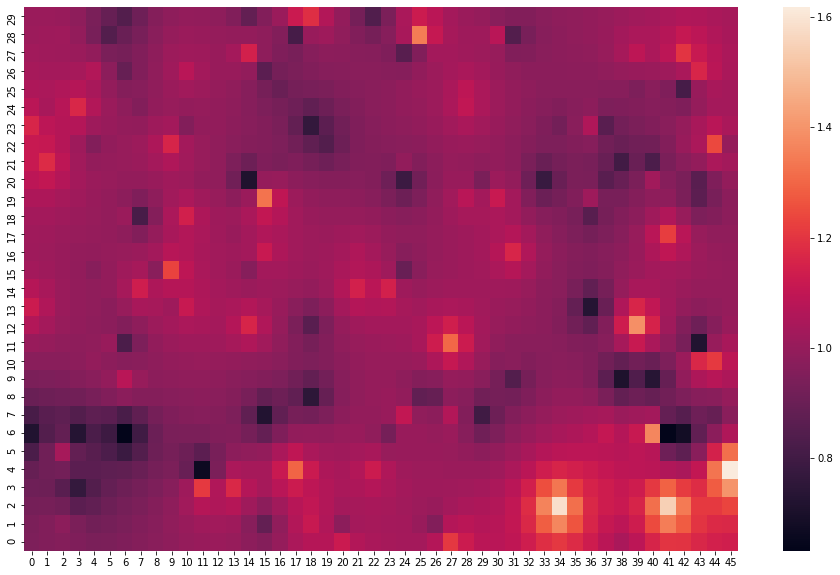

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(weight_map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
test_mask = pd.isnull(map_train)

In [ ]:
def stochastic_average(map_train, test_mask, n_itr):
    idx = np.argwhere(test_mask.ravel())
    map_test = np.zeros_like(map_train)
    for k in range(n_itr):
        map_test_sample = map_train.copy()
        np.random.seed(k)
        random_idx = np.random.permutation(idx)
        random_idx = np.hstack(np.unravel_index(random_idx, (test_mask.shape[0], test_mask.shape[1])))

        for i, j in random_idx:
            if np.isnan(map_test_sample[i,j]):
                map_test_sample[i,j] = moving_average(i, j, map_test_sample) * weight_map_test[i, j]
        map_test += map_test_sample

    map_test /= n_itr
    return map_test

In [ ]:
map_test = stochastic_average(map_train, test_mask, 5)

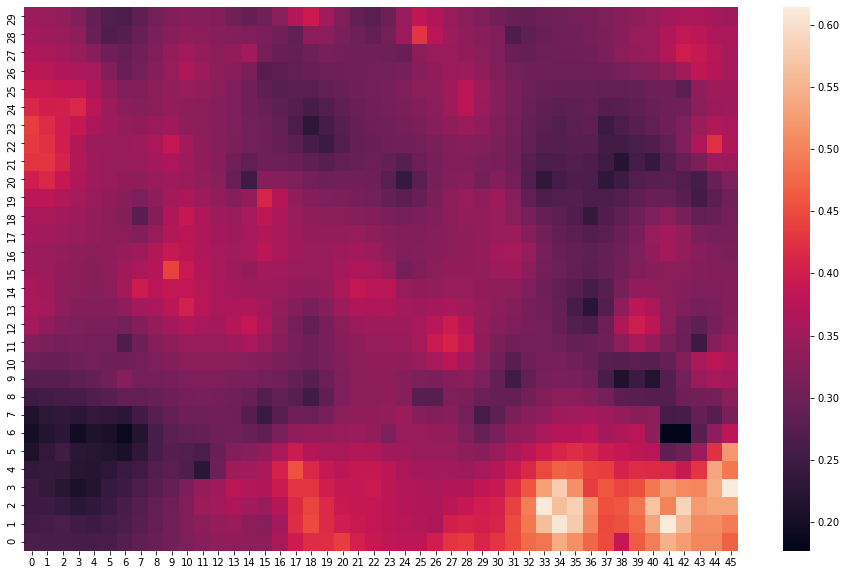

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
out_weight_stochastic = get_pandas_out(map_test, test_mask)
out_weight_stochastic

,Well,X,Y,NTG
0,201-901,201,901,0.263528
1,201-902,201,902,0.255494
2,201-903,201,903,0.247041
3,201-904,201,904,0.245450
4,201-905,201,905,0.236253
...,...,...,...,...
1237,246-926,246,926,0.348946
1238,246-927,246,927,0.356353
1239,246-928,246,928,0.356945
1240,246-929,246,929,0.360794


In [ ]:
# 28 фев 2021, 02:29:58

out_weight_stochastic.to_csv('out_weight_stochastic.csv', index=False)

# Рекурсивная карта весов

In [ ]:
def recursive_weight_map(train, level=0):
    fake_train = train.copy()
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                fake_train[i,j] = moving_average(i, j, train)
    weight_train = train / fake_train

    if level > 0:
        weight_test = recursive_weight_map(weight_train, level - 1)
    else:
        weight_test = weight_train.copy()
        for i in range(weight_test.shape[0]):
            for j in range(weight_test.shape[1]):
                if np.isnan(weight_test[i,j]):
                    weight_test[i,j] = moving_average(i, j, weight_train)
    
    test = train.copy()
    for i in range(test.shape[0]):
        for j in range(test.shape[1]):
            if np.isnan(test[i,j]):
                test[i,j] = moving_average(i, j, train) * weight_test[i, j]
    
    return test

In [ ]:
map_test = recursive_weight_map(map_train, 2)

In [ ]:
map_test

array([[0.28033208, 0.29149839, 0.3011265 , ..., 0.57577361, 0.54436797,
        0.52825503],
       [0.27278415, 0.29382781, 0.2628    , ..., 0.64399979, 0.59601288,
        0.58976502],
       [0.25719451, 0.25966711, 0.24625218, ..., 0.66973889, 0.67226734,
        0.73179552],
       ...,
       [0.37252885, 0.37013013, 0.36721745, ..., 0.49533551, 0.43181153,
        0.38638185],
       [0.36183349, 0.36408776, 0.3452    , ..., 0.44666232, 0.40595425,
        0.37895561],
       [0.35326289, 0.35346585, 0.35172872, ..., 0.39757442, 0.38266669,
        0.36824858]])

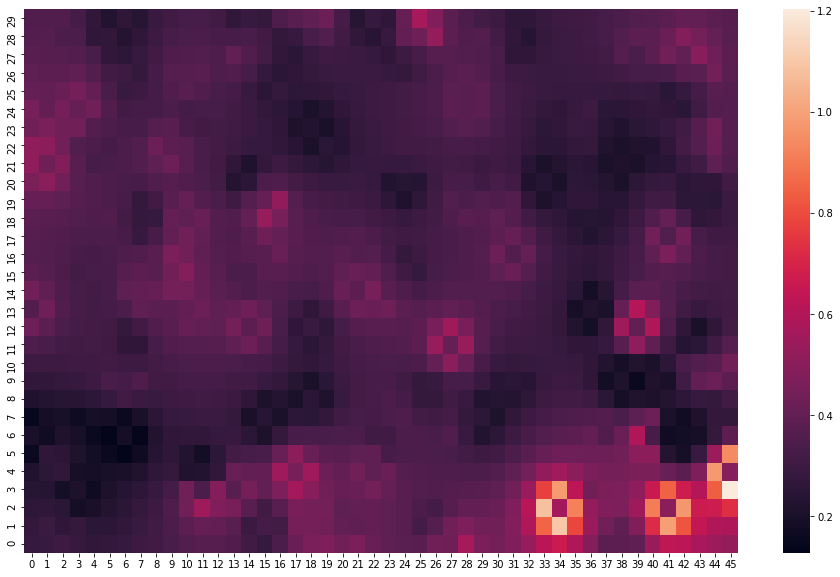

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

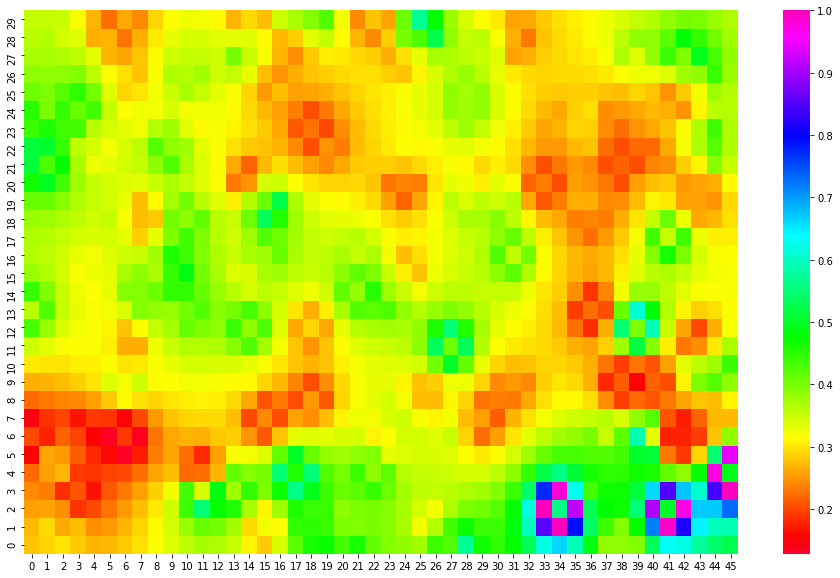

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test, cmap='gist_rainbow', vmax=1.)
ax.invert_yaxis()
plt.show()

In [ ]:
def stochastic_recursive_weight_map(train, test_mask, level):
    fake_train = train.copy()
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                fake_train[i,j] = moving_average(i, j, train)
    weight_train = train / fake_train

    if level > 0:
        weight_test = recursive_weight_map(weight_train, level - 1)
    else:
        weight_test = stochastic_average(weight_train, test_mask, 1)
    
    test = stochastic_average(train, test_mask, 1) * weight_test
    
    return test

In [ ]:
map_test = stochastic_recursive_weight_map(map_train, test_mask, 2)

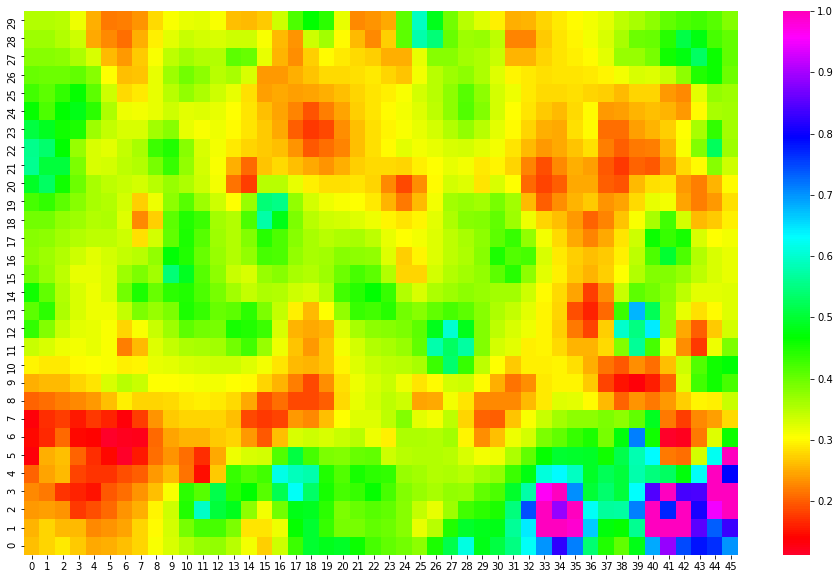

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test, cmap='gist_rainbow', vmax=1.)
ax.invert_yaxis()
plt.show()

In [ ]:
map_test = stochastic_recursive_weight_map(map_train, test_mask, 1)

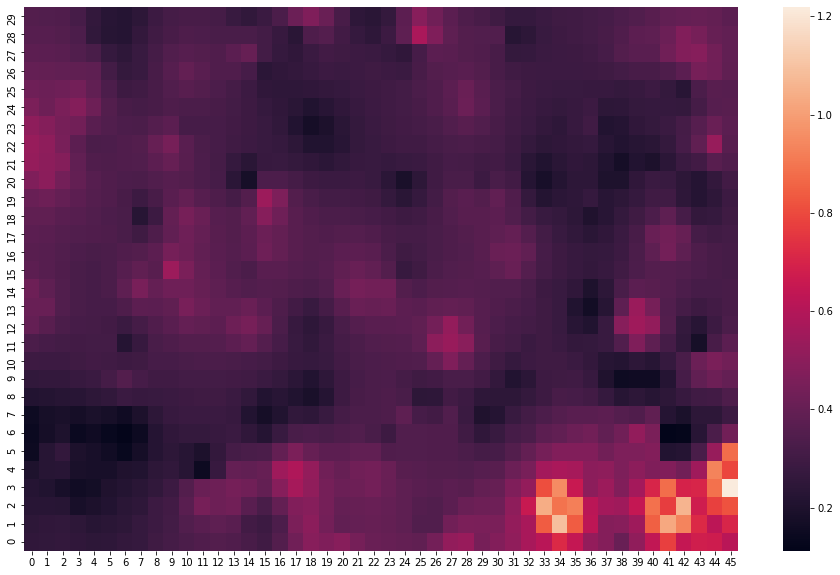

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

# Линейная регрессия

In [ ]:
train

,X,Y,NTG
0,0,6,0.2006
1,0,13,0.3624
2,0,23,0.4381
3,1,21,0.4289
4,1,24,0.4021
...,...,...,...
133,44,7,0.2719
134,44,10,0.3780
135,44,22,0.4239
136,45,4,0.4900


In [ ]:
train['X'] /= 45.0
train['Y'] /= 45.0
train

,X,Y,NTG
0,0.000000,0.133333,0.2006
1,0.000000,0.288889,0.3624
2,0.000000,0.511111,0.4381
3,0.022222,0.466667,0.4289
4,0.022222,0.533333,0.4021
...,...,...,...
133,0.977778,0.155556,0.2719
134,0.977778,0.222222,0.3780
135,0.977778,0.488889,0.4239
136,1.000000,0.088889,0.4900


In [ ]:
def get_features(data, features_size):
    new_data = data.copy()
    centers = data.sample(n=features_size)
    for i in range(len(centers)):
        new_data[str(i)] = 1 / (new_data['X'] - centers.iloc[i]['X'])**2 + (new_data['Y'] - centers.iloc[i]['Y'])**2
    return new_data

In [ ]:
get_features(train, 5)

,X,Y,NTG,0,1,2,3,4
0,0,6,0.2006,inf,36.000657,196.008264,144.010000,64.001890
1,0,13,0.3624,inf,1.000657,49.008264,25.010000,1.001890
2,0,23,0.4381,inf,121.000657,9.008264,25.010000,81.001890
3,1,21,0.4289,65.000000,81.000693,1.010000,9.012346,49.002066
4,1,24,0.4021,122.000000,144.000693,16.010000,36.012346,100.002066
...,...,...,...,...,...,...,...,...
133,44,7,0.2719,36.000517,25.040000,169.000918,121.000865,49.002268
134,44,10,0.3780,9.000517,4.040000,100.000918,64.000865,16.002268
135,44,22,0.4239,81.000517,100.040000,4.000918,16.000865,64.002268
136,45,4,0.4900,81.000494,64.027778,256.000865,196.000816,100.002066


# IDWR (Inverse Distance Weighted Regression)

In [ ]:
def inv_stat_sum(a, b, map_train):
    s = 0
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            if not np.isnan(map_train[i,j]):
                if dist(a, b, i, j) > 0:
                    s += dist(a, b, i, j)
    return s

In [ ]:
def baseline(map_train):
    map_test = map_train.copy()
    for i in range(map_test.shape[0]):
        for j in range(map_test.shape[1]):
            if np.isnan(map_test[i,j]):
                map_test[i,j] = moving_average(i, j, map_train)
    return map_test

In [ ]:
def idwr(map_train, baseline):
    # вычисляем baseline idw
    map_test = baseline(map_train)
    
    n = np.count_nonzero(~np.isnan(map_train))
    s = np.nansum(map_train)
    for i in range(map_test.shape[0]):
        for j in range(map_test.shape[1]):
            if np.isnan(map_train[i,j]):
                numerator = s - n * map_test[i,j]
                denominator = n**2 - stat_sum(i, j, map_train) * inv_stat_sum(i, j, map_train)
                map_test[i,j] += n * numerator / denominator
    return map_test

In [ ]:
map_test = idwr(map_train, baseline)

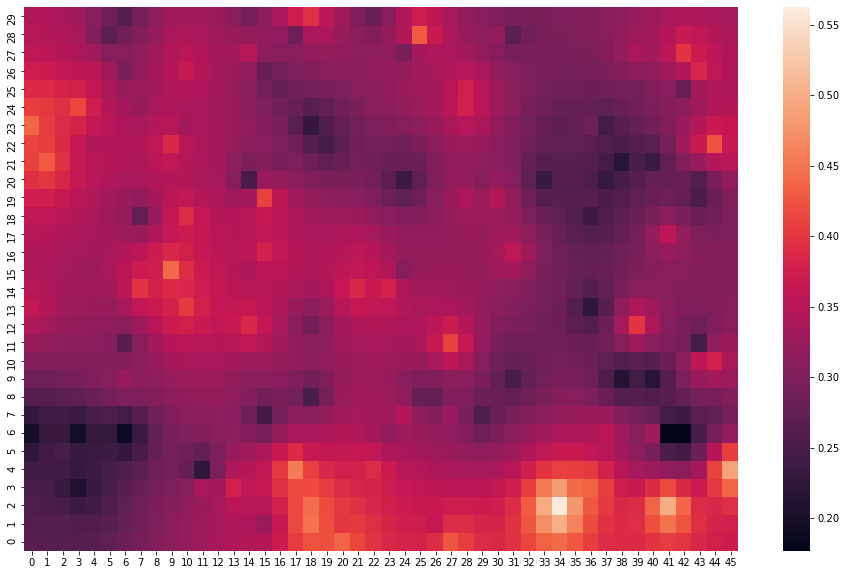

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
map_baseline = baseline(map_train)

In [ ]:
map_baseline - map_test

array([[ 0.01444596,  0.00975532,  0.0064826 , ..., -0.01539581,
        -0.01428661, -0.0137894 ],
       [ 0.01298238,  0.0063192 ,  0.        , ..., -0.01393721,
        -0.01299565, -0.01331789],
       [ 0.01323886,  0.00901497,  0.00594589, ..., -0.0110913 ,
        -0.01140708, -0.01319477],
       ...,
       [-0.00579887, -0.00336459, -0.00185621, ..., -0.0026139 ,
        -0.00335121, -0.00317929],
       [-0.00465549, -0.00195561,  0.        , ..., -0.00399293,
        -0.00379899, -0.00320964],
       [-0.00444965, -0.00253858, -0.00142218, ..., -0.00378974,
        -0.0034197 , -0.00275559]])

In [ ]:
np.max(map_test)

0.5625

In [ ]:
np.max(map_baseline)

0.5625

In [ ]:
np.min(map_test)

0.177

In [ ]:
np.min(map_baseline)

0.177

In [ ]:
out_idwr = get_pandas_out(map_test, test_mask)
out_idwr

,Well,X,Y,NTG
0,201-901,201,901,0.264666
1,201-902,201,902,0.261070
2,201-903,201,903,0.256744
3,201-904,201,904,0.251367
4,201-905,201,905,0.243881
...,...,...,...,...
1237,246-926,246,926,0.341917
1238,246-927,246,927,0.343849
1239,246-928,246,928,0.343785
1240,246-929,246,929,0.340711


In [ ]:
# 1 мрт 2021, 03:34:41

out_idwr.to_csv('out_idwr.csv', index=False)

In [ ]:
def idwr_recursive_weight_map(train, level=0):
    fake_train = train.copy()
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                fake_train[i,j] = moving_average(i, j, train)

    n = np.count_nonzero(~np.isnan(train))
    s = np.nansum(train)
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                numerator = s - n * fake_train[i,j]
                denominator = n**2 - stat_sum(i, j, train) * inv_stat_sum(i, j, train)
                fake_train[i,j] += n * numerator / denominator
    weight_train = train / fake_train

    if level > 0:
        weight_test = recursive_weight_map(weight_train, level - 1)
    else:
        weight_test = idwr(weight_train, baseline)
    
    test = idwr(train, baseline) * weight_test
    
    return test

In [ ]:
map_test = idwr_recursive_weight_map(map_train, level=0)

# Декластеризация

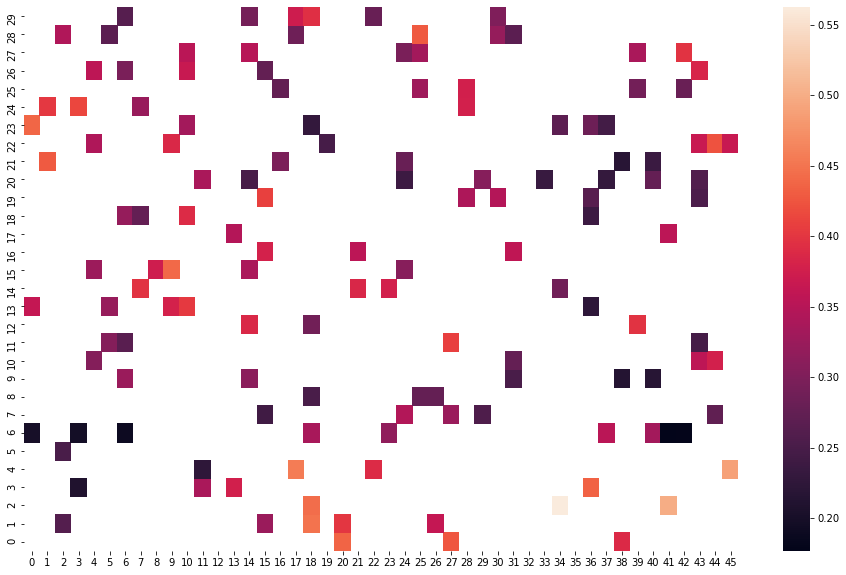

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_train)
ax.invert_yaxis()
plt.show()

In [ ]:
def declustering_mean(map_train, cell_size, offset):
    n_cell = {}
    local_mean = {}
    global_mean = 0
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            a = (i - offset) // cell_size
            b = (j - offset) // cell_size
            if not np.isnan(map_train[i,j]):
                if (a, b) in n_cell:
                    n_cell[(a, b)] += 1
                    local_mean[(a, b)] += map_train[i,j]
                else:
                    n_cell[(a, b)] = 1
                    local_mean[(a, b)] = map_train[i,j]

    for key in n_cell:
        if n_cell[key[0], key[1]] > 0:
            local_mean[key[0], key[1]] /= n_cell[key[0], key[1]]
            global_mean += local_mean[key[0], key[1]]
    
    N = len(n_cell)
    global_mean /= N
    #for i in range(weight_map.shape[0]):
    #    for j in range(weight_map.shape[1]):
    #        a = (i - offset) // cell_size
    #        b = (j - offset) // cell_size
    #        if not np.isnan(weight_map[i,j]):
    #            weight_map[i,j] = 1 / (N * n_cell[(a, b)])

    return global_mean

In [ ]:
declustering_mean(map_train, 5, 1)

0.33229833333333325

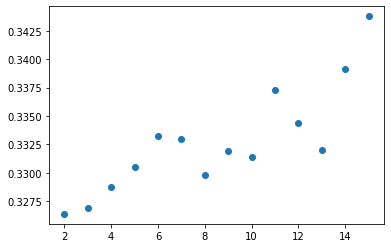

In [ ]:
global_mean = []
num_offsets = 4
for cell_size in range(2, 16):
    s = 0
    for offset in range(0, num_offsets):
        s += declustering_mean(map_train, cell_size, offset)
    s /= num_offsets
    global_mean.append(s)
plt.scatter(np.arange(2, 16), global_mean)

In [ ]:
def declustering(map_train, cell_size, offset):
    weight_map = map_train.copy()
    n_cell = {}
    local_mean = {}
    global_mean = 0
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            a = (i - offset) // cell_size
            b = (j - offset) // cell_size
            if not np.isnan(map_train[i,j]):
                if (a, b) in n_cell:
                    n_cell[(a, b)] += 1
                    local_mean[(a, b)] += map_train[i,j]
                else:
                    n_cell[(a, b)] = 1
                    local_mean[(a, b)] = map_train[i,j]

    for key in n_cell:
        if n_cell[key[0], key[1]] > 0:
            local_mean[key[0], key[1]] /= n_cell[key[0], key[1]]
            global_mean += local_mean[key[0], key[1]]
    
    N = len(n_cell)
    global_mean /= N
    for i in range(weight_map.shape[0]):
        for j in range(weight_map.shape[1]):
            a = (i - offset) // cell_size
            b = (j - offset) // cell_size
            if not np.isnan(weight_map[i,j]):
                weight_map[i,j] = 1 / (N * n_cell[(a, b)])

    return weight_map

In [ ]:
weight_map = np.zeros_like(map_train)
for offset in range(4):
    weight_map += declustering(map_train, 8, offset)
weight_map /= 4

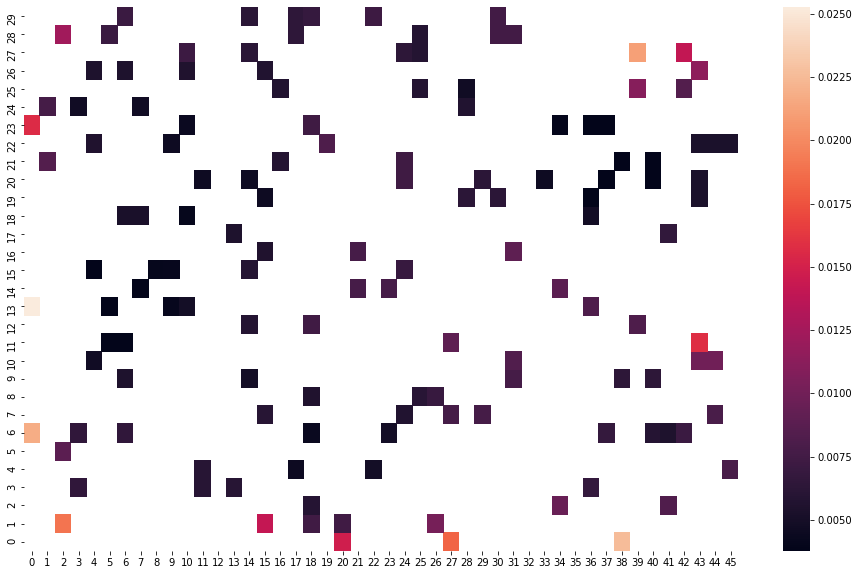

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(weight_map)
ax.invert_yaxis()
plt.show()

In [ ]:
def declustered_stat_sum(a, b, map_train, weight_map):
    s = 0
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            if not np.isnan(map_train[i,j]):
                if dist(a, b, i, j) > 0:
                    s += weight_map[i,j] / dist(a, b, i, j)
    return s

In [ ]:
def declustered_moving_average(a, b, map_train, weight_map):
    ntg = 0
    s = declustered_stat_sum(a, b, map_train, weight_map)
    for i in range(map_train.shape[0]):
        for j in range(map_train.shape[1]):
            if not np.isnan(map_train[i,j]):
                if dist(a, b, i, j) > 0:
                    ntg += (weight_map[i,j] * map_train[i,j] / dist(a, b, i, j)) / s
    return ntg

In [ ]:
def declustered_baseline(map_train, weight_map):
    map_test = map_train.copy()
    for i in range(map_test.shape[0]):
        for j in range(map_test.shape[1]):
            if np.isnan(map_test[i,j]):
                map_test[i,j] = declustered_moving_average(i, j, map_train, weight_map)
    return map_test

In [ ]:
map_test = declustered_baseline(map_train, weight_map)

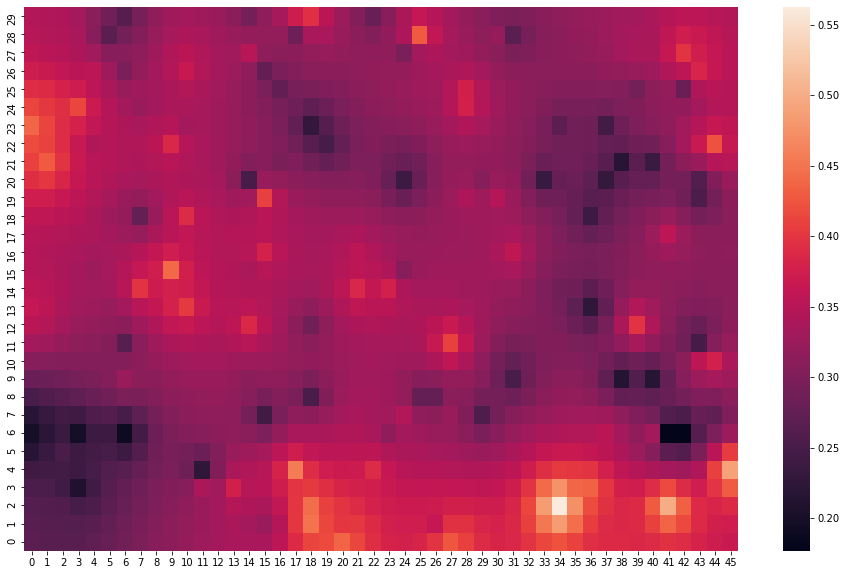

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
out_declustered = get_pandas_out(map_test, test_mask)
out_declustered

,Well,X,Y,NTG
0,201-901,201,901,0.269884
1,201-902,201,902,0.266003
2,201-903,201,903,0.261655
3,201-904,201,904,0.253887
4,201-905,201,905,0.240597
...,...,...,...,...
1237,246-926,246,926,0.348110
1238,246-927,246,927,0.351915
1239,246-928,246,928,0.352652
1240,246-929,246,929,0.350353


In [ ]:
# 1 мрт 2021, 18:26:09

out_declustered.to_csv('out_declustered.csv', index=False)

In [ ]:
def declustered_idwr(map_train, weight_map):
    # вычисляем baseline idw
    map_test = declustered_baseline(map_train, weight_map)
    
    n = np.count_nonzero(~np.isnan(map_train))
    s = np.nansum(map_train)
    for i in range(map_test.shape[0]):
        for j in range(map_test.shape[1]):
            if np.isnan(map_train[i,j]):
                numerator = s - n * map_test[i,j]
                denominator = n**2 - stat_sum(i, j, map_train) * inv_stat_sum(i, j, map_train)
                map_test[i,j] += n * numerator / denominator
    return map_test

In [ ]:
map_test = declustered_idwr(map_train, weight_map)

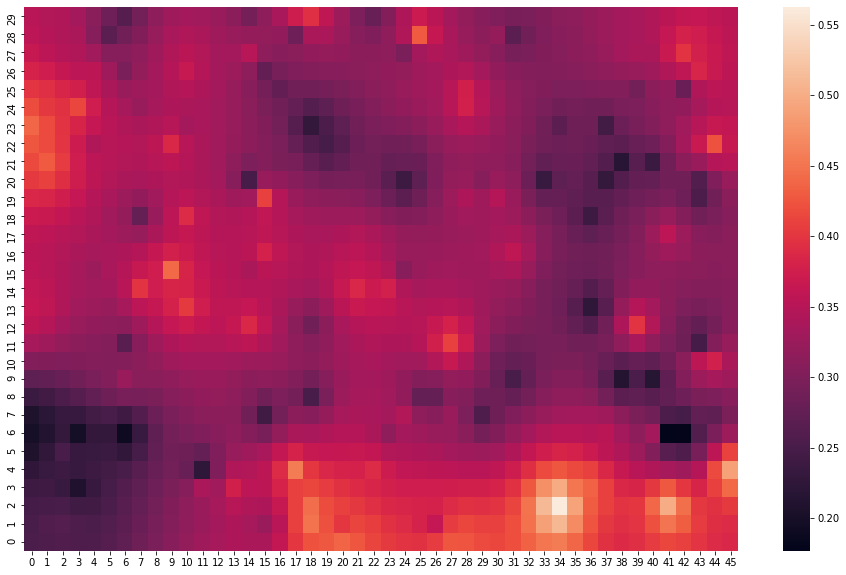

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
def declustered_idwr_recursive_weight_map(train, declus_weight, level=0):
    fake_train = train.copy()
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                fake_train[i,j] = declustered_moving_average(i, j, train, declus_weight)

    n = np.count_nonzero(~np.isnan(train))
    s = np.nansum(train)
    for i in range(fake_train.shape[0]):
        for j in range(fake_train.shape[1]):
            if not np.isnan(fake_train[i,j]):
                numerator = s - n * fake_train[i,j]
                denominator = n**2 - stat_sum(i, j, train) * inv_stat_sum(i, j, train)
                fake_train[i,j] += n * numerator / denominator
    weight_train = train / fake_train

    if level > 0:
        weight_test = recursive_weight_map(weight_train, level - 1)
    else:
        weight_test = declustered_idwr(weight_train, declus_weight)
    
    test = declustered_idwr(train, declus_weight) * weight_test
    
    return test

In [ ]:
map_test = declustered_idwr_recursive_weight_map(map_train, weight_map, 0)

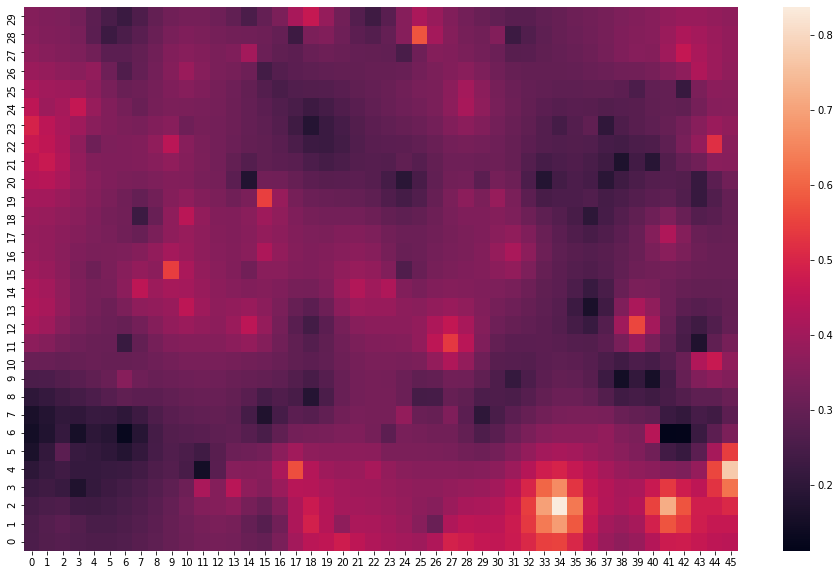

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

(array([  2.,   1.,   3.,   5.,   9.,   7.,  16.,  26.,  29.,  52.,  71.,
         97., 123., 127., 112., 143., 127., 103.,  78.,  59.,  33.,  41.,
         24.,  22.,  14.,  13.,   7.,   5.,   1.,   6.,   6.,   3.,   4.,
          1.,   1.,   1.,   2.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.1125262 , 0.12674438, 0.14096257, 0.15518075, 0.16939893,
        0.18361711, 0.1978353 , 0.21205348, 0.22627166, 0.24048985,
        0.25470803, 0.26892621, 0.28314439, 0.29736258, 0.31158076,
        0.32579894, 0.34001713, 0.35423531, 0.36845349, 0.38267167,
        0.39688986, 0.41110804, 0.42532622, 0.4395444 , 0.45376259,
        0.46798077, 0.48219895, 0.49641714, 0.51063532, 0.5248535 ,
        0.53907168, 0.55328987, 0.56750805, 0.58172623, 0.59594442,
        0.6101626 , 0.62438078, 0.63859896, 0.65281715, 0.66703533,
        0.68125351, 0.6954717 , 0.70968988, 0.72390806, 0.73812624,
        0.75234443, 0.76656261, 0.780780

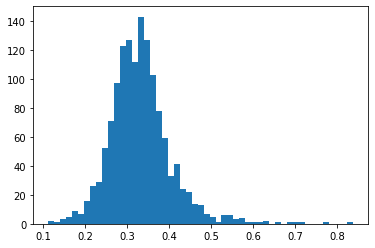

In [ ]:
plt.hist(map_test.ravel(), bins='auto')

In [ ]:
map_test.mean()

0.33151502394796145

In [ ]:
declustering_mean(map_train, 8, 0)

0.32514525297619046

In [ ]:
out_declustered_recursive = get_pandas_out(map_test, test_mask)
out_declustered_recursive

,Well,X,Y,NTG
0,201-901,201,901,0.258277
1,201-902,201,902,0.255187
2,201-903,201,903,0.243065
3,201-904,201,904,0.223521
4,201-905,201,905,0.199036
...,...,...,...,...
1237,246-926,246,926,0.363916
1238,246-927,246,927,0.373724
1239,246-928,246,928,0.378286
1240,246-929,246,929,0.377177


In [ ]:
# 1 мрт 2021, 19:23:56

out_declustered_recursive.to_csv('out_declustered_recursive.csv', index=False)

In [ ]:
def smoothing(map_test):
    n = map_test.shape[0]
    m = map_test.shape[1]
    bordered_test = np.empty((n+2,m+2))
    bordered_test[:] = np.nan
    bordered_test[1:-1,1:-1] = map_test
    new_test = np.empty_like(map_test)
    for i in range(n):
        for j in range(m):
            new_test[i,j] = np.nansum(bordered_test[i:i+2, j:j+2]) / np.count_nonzero(~np.isnan(bordered_test[i:i+2, j:j+2]))
    return new_test

In [ ]:
map_test = smoothing(map_test)

In [ ]:
map_test

array([[0.2582767 , 0.26354392, 0.27178419, ..., 0.47183869, 0.45781668,
        0.44884093],
       [0.25673199, 0.26354025, 0.27494148, ..., 0.4912986 , 0.46598595,
        0.45673647],
       [0.24912606, 0.25655393, 0.26806411, ..., 0.5212803 , 0.47933765,
        0.48018524],
       ...,
       [0.38205532, 0.37628266, 0.36558415, ..., 0.41938498, 0.40791182,
        0.38528186],
       [0.36537567, 0.35988799, 0.35140449, ..., 0.42769161, 0.40332764,
        0.38541715],
       [0.35624677, 0.35221582, 0.34625958, ..., 0.40246659, 0.39266823,
        0.38054267]])

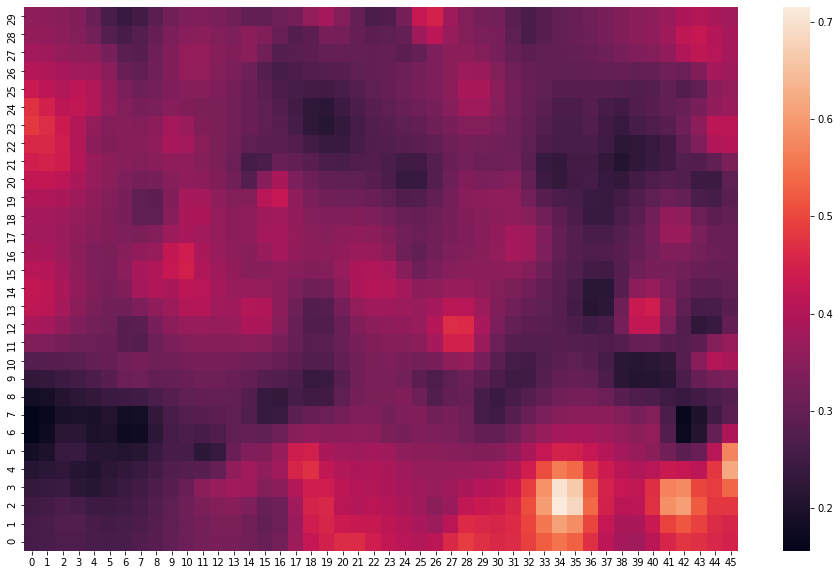

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(map_test)
ax.invert_yaxis()
plt.show()

In [ ]:
out_ridwr_smooth = get_pandas_out(map_test, test_mask)
out_ridwr_smooth

,Well,X,Y,NTG
0,201-901,201,901,0.258277
1,201-902,201,902,0.256732
2,201-903,201,903,0.249126
3,201-904,201,904,0.233293
4,201-905,201,905,0.211279
...,...,...,...,...
1237,246-926,246,926,0.362346
1238,246-927,246,927,0.374661
1239,246-928,246,928,0.385282
1240,246-929,246,929,0.385417


In [ ]:
# 1 мрт 2021, 20:04:14

out_ridwr_smooth.to_csv('out_ridwr_smooth.csv', index=False)